# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [26]:
start_date = datetime.datetime(2006,1,1)
end_date = datetime.datetime(2016,1,1)

In [27]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start_date, end_date)

#CitiGroup
C = data.DataReader("C", 'yahoo', start_date, end_date)

#Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start_date, end_date)

#JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start_date, end_date)

#Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start_date, end_date)

#Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start_date, end_date)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [28]:
tickers = ["BAC","C","GS","JPM","MS","WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [29]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys = tickers)

bank_stocks.head(2)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584061   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227398   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   

                                                WFC                     \
                Close     Volume  Adj Close    High     Low       Open   
Date                                                                     
2006-01-03  58.310001  5377000.0  35.558990  31.975  31.195  31.600000   
2006-01-04  58.349998  7977800.0  35.583363  31.820  31.365  31.799999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242825  
2006-01-04  31.530001  10870000.0  20.008034  

[2 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [67]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [68]:
bank_stocks = bank_stocks.round(2)

In [69]:
bank_stocks.head(5)

Bank Ticker    BAC                                                 C         \
Stock Info    High    Low   Open  Close      Volume Adj Close   High    Low   
Date                                                                          
2006-01-03   47.18  46.15  46.92  47.08  16296700.0     33.58  493.8  481.1   
2006-01-04   47.24  46.45  47.00  46.58  17757900.0     33.23  491.0  483.5   
2006-01-05   46.83  46.32  46.58  46.64  14970700.0     33.27  487.8  484.0   
2006-01-06   46.91  46.35  46.80  46.57  12599800.0     33.22  489.0  482.0   
2006-01-09   46.97  46.36  46.72  46.60  15619400.0     33.24  487.4  483.0   

Bank Ticker                ...     MS                                WFC  \
Stock Info    Open  Close  ...   Open  Close     Volume Adj Close   High   
Date                       ...                                             
2006-01-03   490.0  492.9  ...  57.17  58.31  5377000.0     35.56  31.98   
2006-01-04   488.6  483.8  ...  58.70  58.35  7977800.0     35.58  31.82   
2006-01-05   484.4  486.2  ...  58.55  58.51  5778000.0     35.68  31.56   
2006-01-06   488.8  486.2  ...  58.77  58.57  6889800.0     35.72  31.77   
2006-01-09   486.0  483.9  ...  58.63  59.19  4144500.0     36.10  31.83   

Bank Ticker                                             
Stock Info     Low   Open  Close      Volume Adj Close  
Date                                                    
2006-01-03   31.19  31.60  31.90  11016400.0     20.24  
2006-01-04   31.36  31.80  31.53  10870000.0     20.01  
2006-01-05   31.31  31.50  31.50  10158000.0     19.99  
2006-01-06   31.39  31.58  31.68   8403800.0     20.10  
2006-01-09   31.56  31.67  31.67   5619600.0     20.10  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [70]:
for tick in tickers:
    print(tick, "-", bank_stocks[tick]["Close"].max())

BAC - 54.9
C - 564.1
GS - 247.92
JPM - 70.08
MS - 89.3
WFC - 58.52


In [71]:
bank_stocks.xs(key="Close", axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [72]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [73]:
for tick in tickers:
    returns[tick + " Return"] = bank_stocks[tick]["Close"].pct_change()

In [74]:
returns.head(5)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000316


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

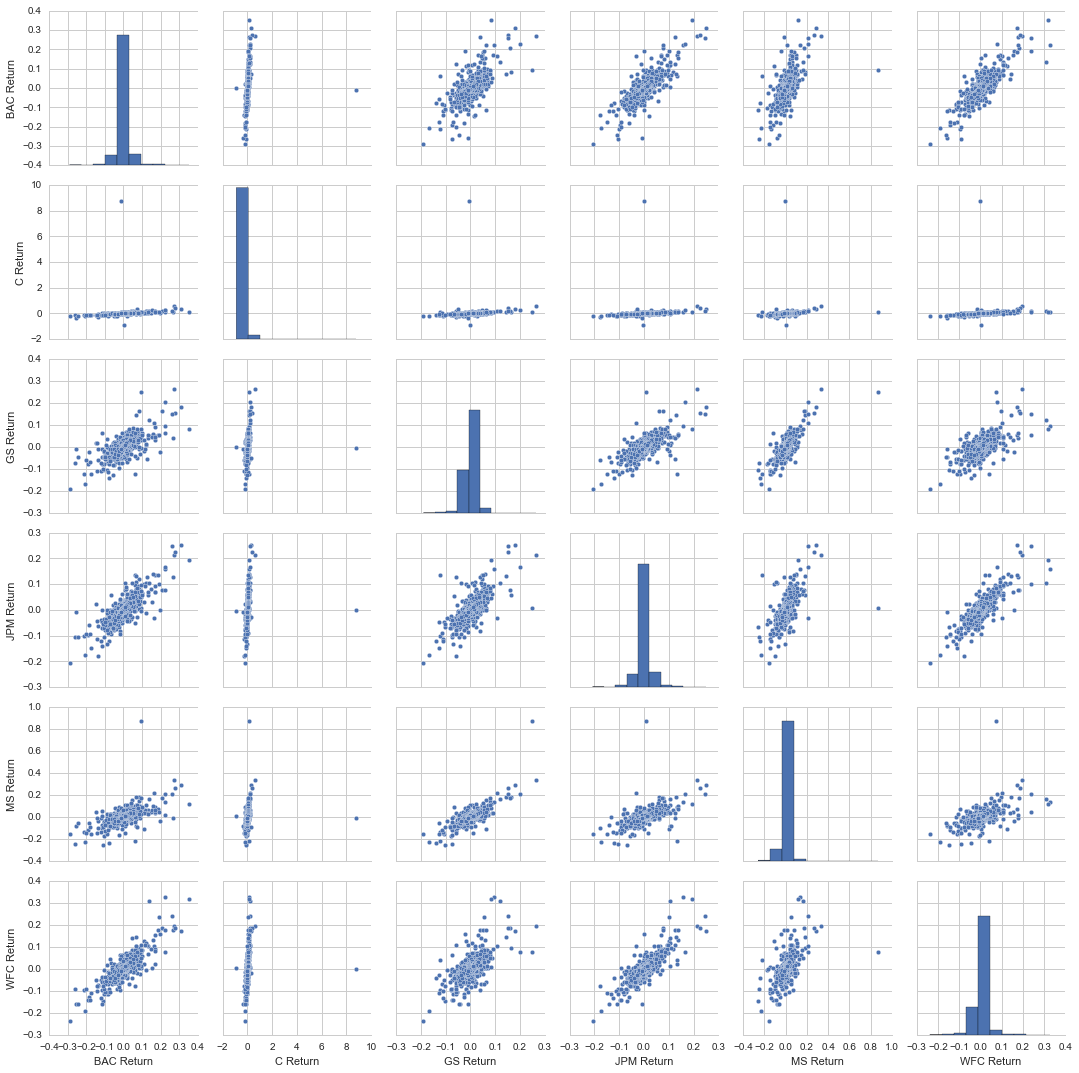

In [68]:
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [75]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [76]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [78]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [81]:
returns["2015-01-01":"2015-12-31"].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

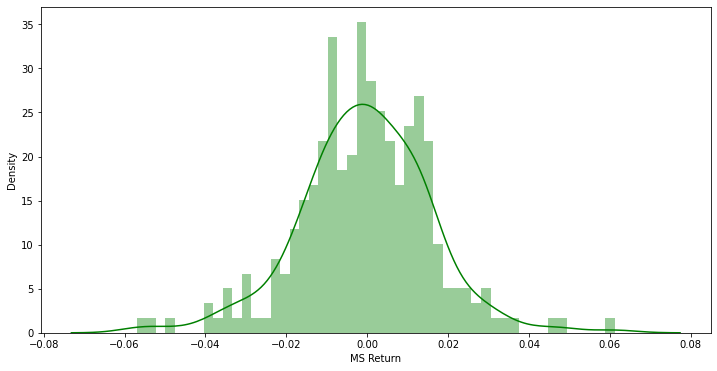

In [100]:
plt.figure(figsize=(12,6))
sns.distplot(returns["2015-01-01":"2015-12-31"]["MS Return"],color="green",bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

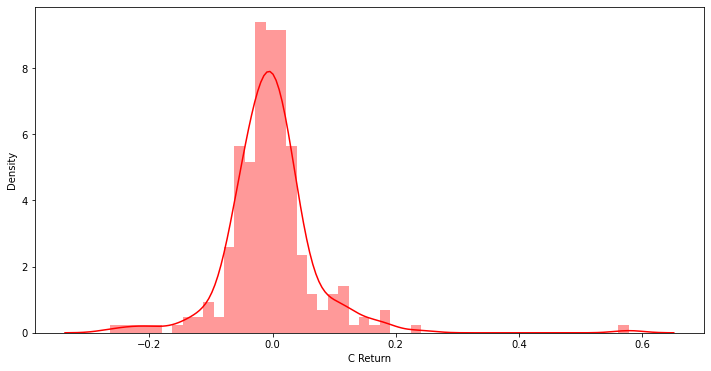

In [99]:
plt.figure(figsize=(12,6))
sns.distplot(returns["2008-01-01":"2008-12-31"]["C Return"],color="red",bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

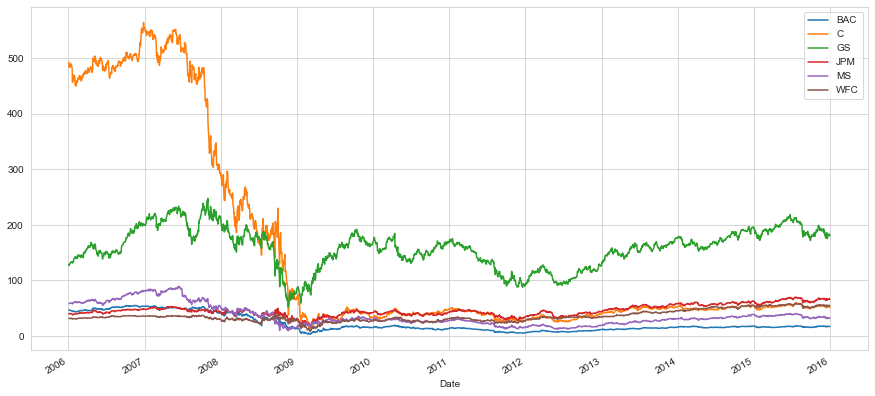

In [105]:
for tick in tickers:
    bank_stocks[tick]["Close"].plot(label=tick,figsize=(15,7))
    
plt.legend()

<AxesSubplot:xlabel='Date'>

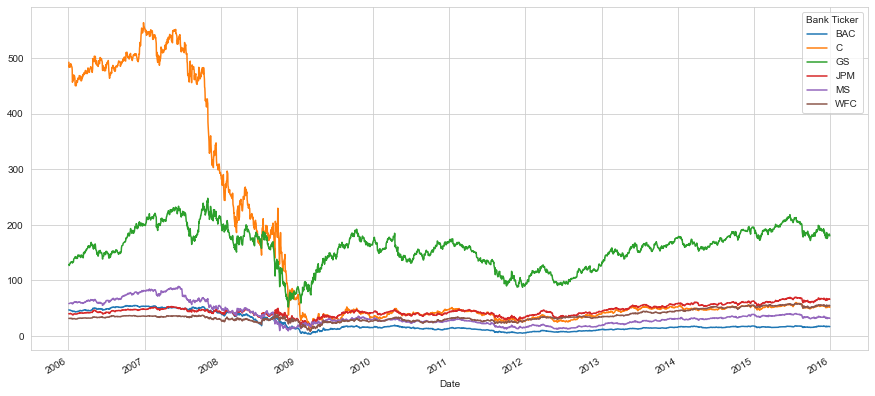

In [109]:
bank_stocks.xs(key="Close",axis=1, level="Stock Info").plot(label=tick,figsize=(15,7))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

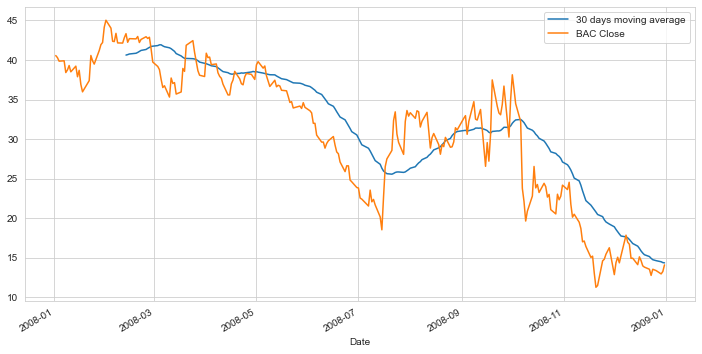

In [114]:
plt.figure(figsize=(12,6))
BAC["Close"]["2008-01-01":"2009-01-01"].rolling(window=30).mean().plot(label="30 days moving average")
BAC["Close"]["2008-01-01":"2009-01-01"].plot(label="BAC Close")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

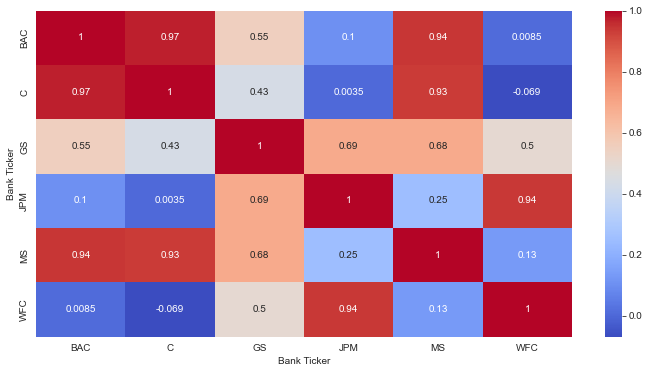

In [118]:
plt.figure(figsize=(12,6))
sns.heatmap(bank_stocks.xs(key="Close",axis=1, level="Stock Info").corr(),cmap="coolwarm",annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 864x432 with 0 Axes>

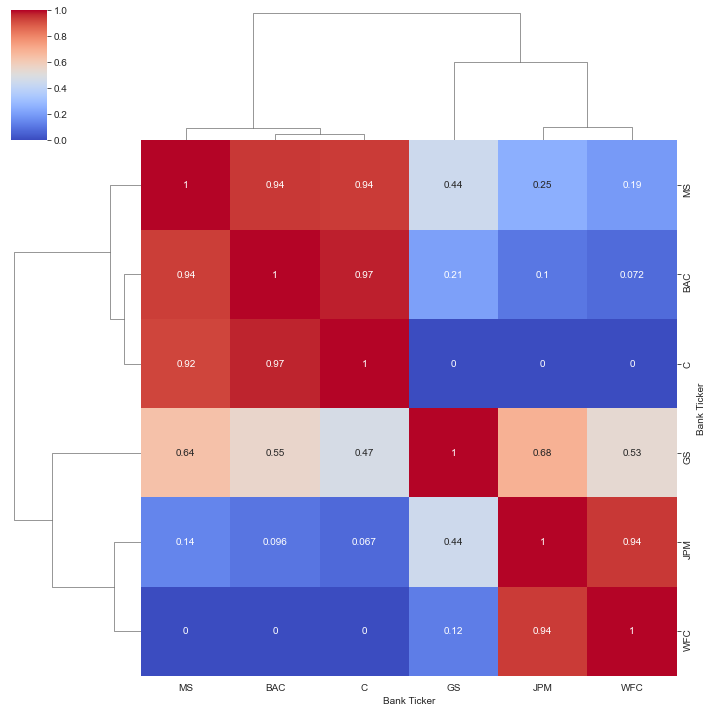

In [121]:
plt.figure(figsize=(12,6))
sns.clustermap(bank_stocks.xs(key="Close",axis=1, level="Stock Info").corr(),cmap="coolwarm",annot=True,standard_scale=1)

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.